In [1]:
#Usando versão python 3.11.5

----

**MODELO**

----

In [1]:
from sklearn import datasets

iris= datasets.load_iris(return_X_y=True)
X = iris[0]
y= iris[1]

In [2]:
datasets.load_iris()["feature_names"] #2 primeiras colunas tamanho petalas, 2 ultimas comprimento e largura

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
datasets.load_iris()["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

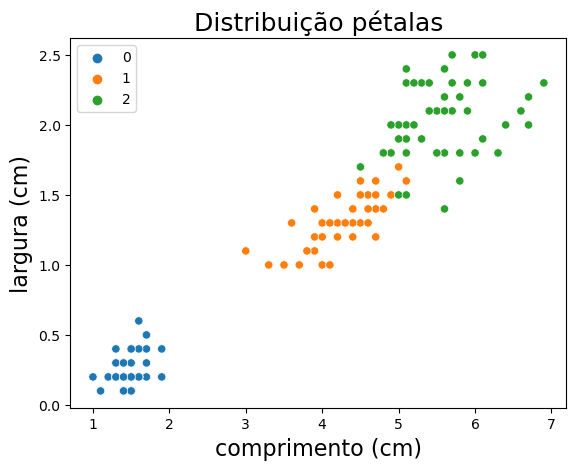

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = X[:,2], y = X[:,3], hue = y, palette = "tab10") #2 [Comprimento] 3 [largura]
plt.xlabel('comprimento (cm)', fontsize = 16)
plt.ylabel('largura (cm)', fontsize = 16)
plt.title('Distribuição pétalas', fontsize = 18)
plt.show()

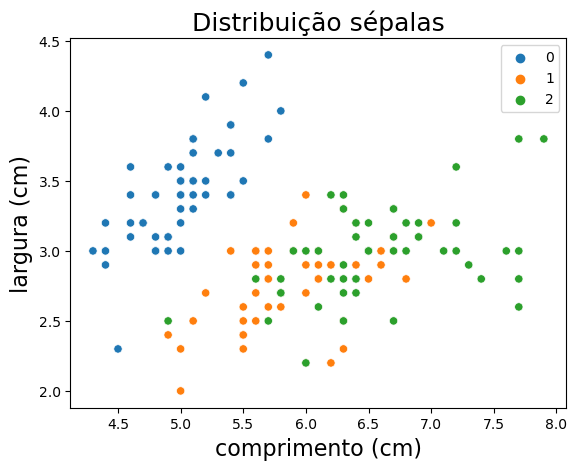

In [5]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y, palette = "tab10")
plt.xlabel('comprimento (cm)', fontsize = 16)
plt.ylabel('largura (cm)', fontsize = 16)
plt.title('Distribuição sépalas', fontsize = 18)
plt.show()

In [6]:
import tensorflow as tf
from tensorflow import keras

In [7]:
y.shape

(150,)

In [ ]:
y = keras.utils.to_categorical(y)
y.shape

(150, 3)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size= 0.2, stratify= y, random_state=42)

In [11]:
X_treino.shape

(120, 4)

In [12]:
X_teste.shape

(30, 4)

In [ ]:
modelo = keras.Sequential([keras.layers.InputLayer(input_shape=[4,],name='entrada'),
                           keras.layers.Dense(512,activation='relu',name='oculta',
                                              kernel_initializer=keras.initializers.RandomNormal(seed=142)),
                           keras.layers.Dense(3,activation='softmax',name='saida')])

c:\Users\Cr0l3y\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [14]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ oculta (Dense)                  │ (None, 512)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ saida (Dense)                   │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,099 (16.01 KB)

 Trainable params: 4,099 (16.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
modelo.compile(loss = 'categorical_crossentropy',
               optimizer = 'rmsprop',
               metrics = ['categorical_accuracy'])

*Treinamento*

In [17]:
epocas=100
historico =modelo.fit(X_treino,y_treino,
           epochs=epocas,
                     validation_split=0.3)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - categorical_accuracy: 0.5102 - loss: 1.0793 - val_categorical_accuracy: 0.6389 - val_loss: 1.0140
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - categorical_accuracy: 0.6674 - loss: 0.9972 - val_categorical_accuracy: 0.6389 - val_loss: 0.9651
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - categorical_accuracy: 0.6869 - loss: 0.9372 - val_categorical_accuracy: 0.6389 - val_loss: 0.9228
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - categorical_accuracy: 0.6869 - loss: 0.8946 - val_categorical_accuracy: 0.6389 - val_loss: 0.8856
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - categorical_accuracy: 0.6908 - loss: 0.8550 - val_categorical_accuracy: 0.6389 - val_loss: 0.8512
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - categorical_accuracy: 0.6713 - loss: 0.8211 - val_categorical_accuracy: 0.6389 - val_loss: 0.8234
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - categorical_accuracy: 0.6674 - loss: 0.7933 - va

**Avaliar aprendizado**

In [19]:
# historico.history # exemplo{'categorical_accuracy': [0.5595238208770752,

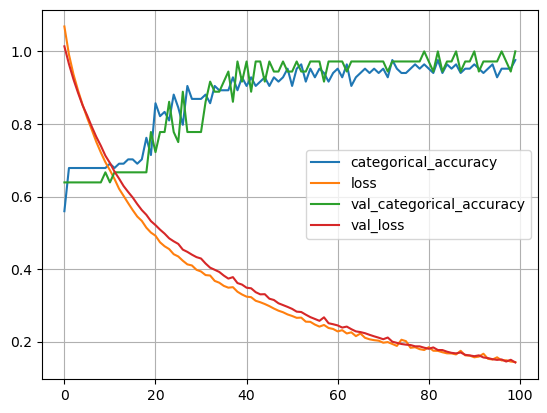

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(historico.history).plot()
plt.grid()
plt.show()

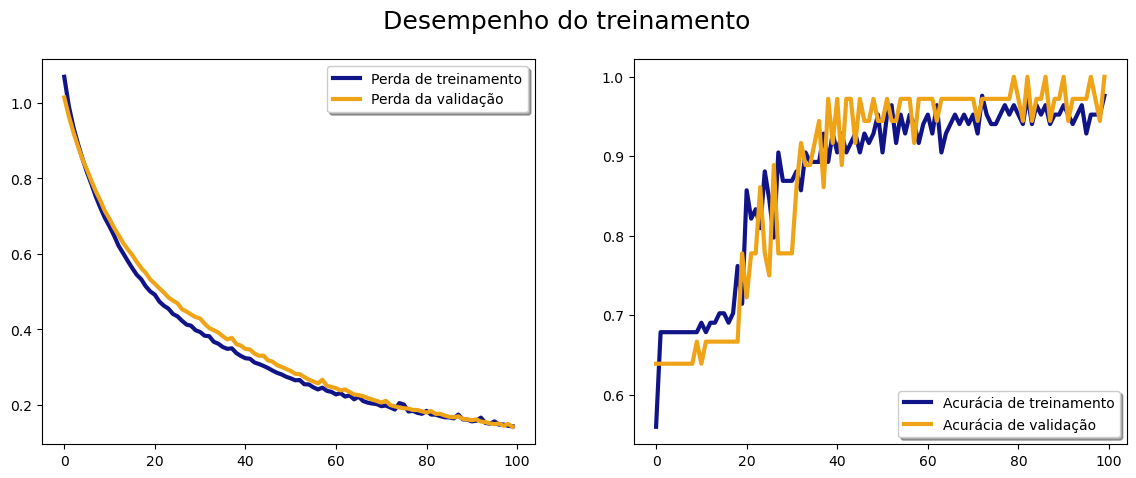

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(historico.history['loss'], color='#111487', linewidth=3, label="Perda de treinamento")
ax[0].plot(historico.history['val_loss'], color='#EFA316', linewidth=3, label="Perda da validação",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(historico.history['categorical_accuracy'], color='#111487', linewidth=3, label="Acurácia de treinamento")
ax[1].plot(historico.history['val_categorical_accuracy'], color='#EFA316', linewidth=3, label="Acurácia de validação")
legend = ax[1].legend(loc='best', shadow=True)

plt.suptitle('Desempenho do treinamento', fontsize = 18)
plt.show()

**Teste**

In [41]:
modelo.evaluate(X_teste,y_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - categorical_accuracy: 0.9667 - loss: 0.1572


[0.15720969438552856, 0.9666666388511658]

In [ ]:
#chegou a funcionar so que tive que mudar pra utilizar novamenete modelo.predict([[0.61, 0.5, 0.69, 0.79]]) 
import numpy as np
input_data = np.array([[0.61, 0.5, 0.69, 0.79]])
modelo.predict(input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[4.7811598e-05, 1.8689148e-01, 8.1306076e-01]], dtype=float32)